In [3]:
import numpy as np
import scipy.linalg
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
from general_graph_utils import *

## Create directed and undirected versions of a graph (both unweighted)

In [5]:
#G_ex1 = nx.DiGraph()
#G_ex1.add_nodes_from([1,2,3,4,5])
#G_ex1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

In [6]:
G_ex2 = nx.DiGraph()
G_ex2.add_nodes_from([1,2,3,4,5])
G_ex2.add_edges_from([(1,2), (2,1), (2,4), (4,2), (2,3), (3,2), (3,5), (5,3), (1,4), (4,1),(5,2),(2,5)])

In [7]:
# G_ex3 = nx.DiGraph()
# G_ex3.add_nodes_from([1,2,3,4,5,6,7])
# G_ex3.add_edges_from([(1,2), (2,1), (1,3), (3,1), (2,4), (4,2), (4,3), (3,4), (3,6), (6,3), (5,4), (4,5),(5,2),(2,5), (4,6), (6,4), (5,7), (7,5),(6,7),(7,6)])

In [8]:
# G_ex3 = nx.DiGraph()
# G_ud3.add_nodes_from([1,2,3,4,5,6,7])
# G_ud3.add_edges_from([(1,2), (2,1), (1,3), (3,1), (2,4), (4,2), (4,3), (3,4), (3,6), (6,3), (5,4), (4,5),(5,2),(2,5), (4,6), (6,4), (5,7), (7,5),(6,7),(7,6)])

In [9]:
#G_ud1 = nx.Graph()
#G_ud1.add_nodes_from([1,2,3,4,5])
#G_ud1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

In [10]:
G_ud2 = nx.Graph()
G_ud2.add_nodes_from([1,2,3,4,5])
G_ud2.add_edges_from([(1,2), (2,1), (2,4), (4,2), (2,3), (3,2), (3,5), (5,3), (1,4), (4,1),(5,2),(2,5)])

In [12]:
# G_ud3 = nx.Graph()
# G_ud3.add_nodes_from([1,2,3,4,5,6,7])
# G_ud3.add_edges_from([(1,2), (2,1), (1,3), (3,1), (2,4), (4,2), (4,3), (3,4), (3,6), (6,3), (5,4), (4,5),(5,2),(2,5), (4,6), (6,4), (5,7), (7,5),(6,7),(7,6)])

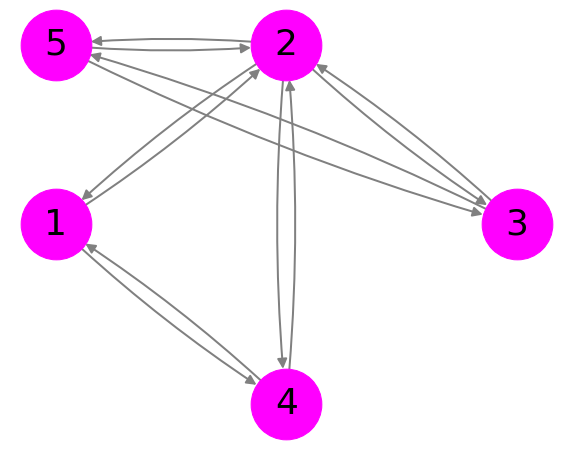

In [11]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-1, 3), 2:(0.5, 6), 3: (2, 3), 4: (0.5, 0), 5: (-1,6)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "magenta",
    "edge_color": "grey",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ex2, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_ex1_diagram.png')

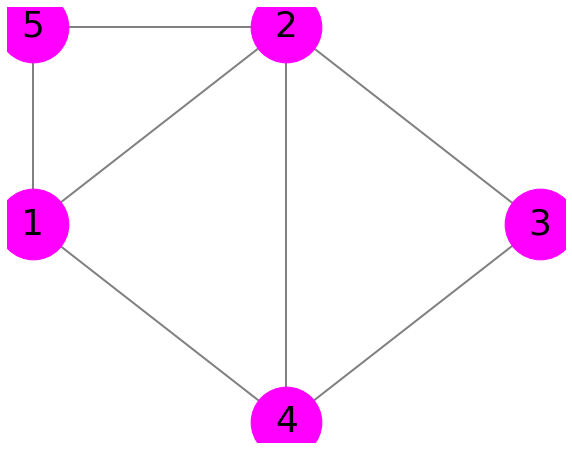

In [73]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-1, 3), 2:(0.5, 6), 3: (2, 3), 4: (0.5, 0), 5: (-1,6)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "magenta",
    "edge_color": "grey",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ud1, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_ud1_diagram.png')

## Create force-area plots

Prior to executing this function, the user should have extracted all relevant information from the graph. This includes the direction specific cycle weight and edge informtation.

Initialization:

In [178]:
node_list = get_nodes(G_ex1)
edge_list = get_edges(G_ex1)
weight_dict, weight_list = get_weights(G_ex1,max_val=10)
cycle_list = get_cycle_nodes(G_ud1)

num_cycles = len(cycle_list)
num_nodes = len(node_list)
num_edges = len(edge_list)

print(cycle_list)
print(num_cycles)
print(weight_dict)

[[1, 2, 4], [1, 2, 5], [2, 3, 4]]
3
{(1, 2): 1, (1, 4): 1, (1, 5): 3, (2, 1): 2, (2, 4): 9, (2, 3): 4, (2, 5): 3, (3, 2): 6, (3, 4): 4, (4, 2): 7, (4, 3): 4, (4, 1): 4, (5, 2): 4, (5, 1): 2}


In [179]:
N = 2500
all_affinities = np.zeros((N,num_cycles))
all_areas = np.zeros((N,1))

observable_ex1 = [3, 5, 7, 9, 11]
tau_n = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)

In [180]:
cycle_edges_forward, cycle_edges_backward, cycle_weights_forward, cycle_weights_backward = get_cycle_weights_edges(G_ud1,cycle_list,weight_dict)
print(cycle_weights_forward)
print(cycle_weights_backward)
print(cycle_edges_forward)

[[1, 9, 4], [1, 3, 2], [4, 4, 7]]
[[2, 7, 1], [2, 4, 3], [6, 4, 9]]
[[(1, 2), (2, 4), (4, 1)], [(1, 2), (2, 5), (5, 1)], [(2, 3), (3, 4), (4, 2)]]


In [181]:
num_cycles = len(cycle_list)
edge_tracker = []

# edge (2,5)
cycle_weights_forward[1][1] = (np.prod(cycle_weights_backward[1]))/((cycle_weights_forward[1][0]*cycle_weights_forward[1][2]))
edge_tracker.append(cycle_edges_forward[1][1])

# edge (4,1)
cycle_weights_forward[0][2] = (np.prod(cycle_weights_backward[0]))/((cycle_weights_forward[0][0]*cycle_weights_forward[0][1]))
edge_tracker.append(cycle_edges_forward[0][2])

# edge (2,3)
cycle_weights_forward[2][0] = (np.prod(cycle_weights_backward[2]))/((cycle_weights_forward[2][1]*cycle_weights_forward[2][2]))
edge_tracker.append(cycle_edges_forward[2][0])

In [182]:
#cycle_weights_forward, edge_tracker = initial_equilibrium_parameter_set(cycle_list,cycle_edges_forward,cycle_weights_forward,cycle_weights_backward)
print(edge_tracker)

[(2, 5), (4, 1), (2, 3)]


In [183]:
products_f, products_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[0. 0. 0.]


In [184]:
all_affinities[0] = total_affinities
#print(all_affinities)

In [185]:
for i in range(num_cycles):
    weight_dict[edge_tracker[i]] = cycle_weights_forward[i][0]

#weight_dict = dict.fromkeys(weight_dict.keys(), 1)
#print(weight_dict)

In [186]:
weight_list = np.fromiter(weight_dict.values(), dtype=float)
print(weight_list)

[1.         1.         3.         2.         9.         7.71428571
 1.         6.         4.         7.         4.         1.
 4.         2.        ]


In [187]:
L = Laplacian_all(edge_list,weight_list,num_nodes,num_edges)
print(L)

[[ -5.           1.           0.           1.           3.        ]
 [  2.         -18.           7.71428571   9.           1.        ]
 [  0.           6.         -11.71428571   4.           0.        ]
 [  1.           7.           4.         -14.           0.        ]
 [  2.           4.           0.           0.          -4.        ]]


In [188]:
t, t_rev = NG_III_autocorrelation_analytical(observable_ex1,L,tau_n,alpha=1,beta=3)

In [190]:
all_areas[0] = np.abs(np.trapz(t)-np.trapz(t_rev))
print(all_areas[0])
#print(np.abs(np.trapz(t)-np.trapz(t_rev)))
#print(all_areas)

[2789.4274763]


In [192]:
print(all_affinities)

[[0.         0.         0.        ]
 [0.69314718 0.69314718 0.12188982]
 [1.09861229 1.09861229 0.23052366]
 ...
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


In [193]:
print(all_areas)

[[2789.4274763 ]
 [1715.59567275]
 [1114.35876017]
 ...
 [   0.        ]
 [   0.        ]
 [   0.        ]]


## So, the calculation is correct, but the allocation is not working. I have no idea why...

In [194]:
# plot formatting
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'
#plt.style.use('dark_background')
#plt.rcParams.update({"figure.facecolor": "111111",
#                   "savefig.facecolor": "111111"})

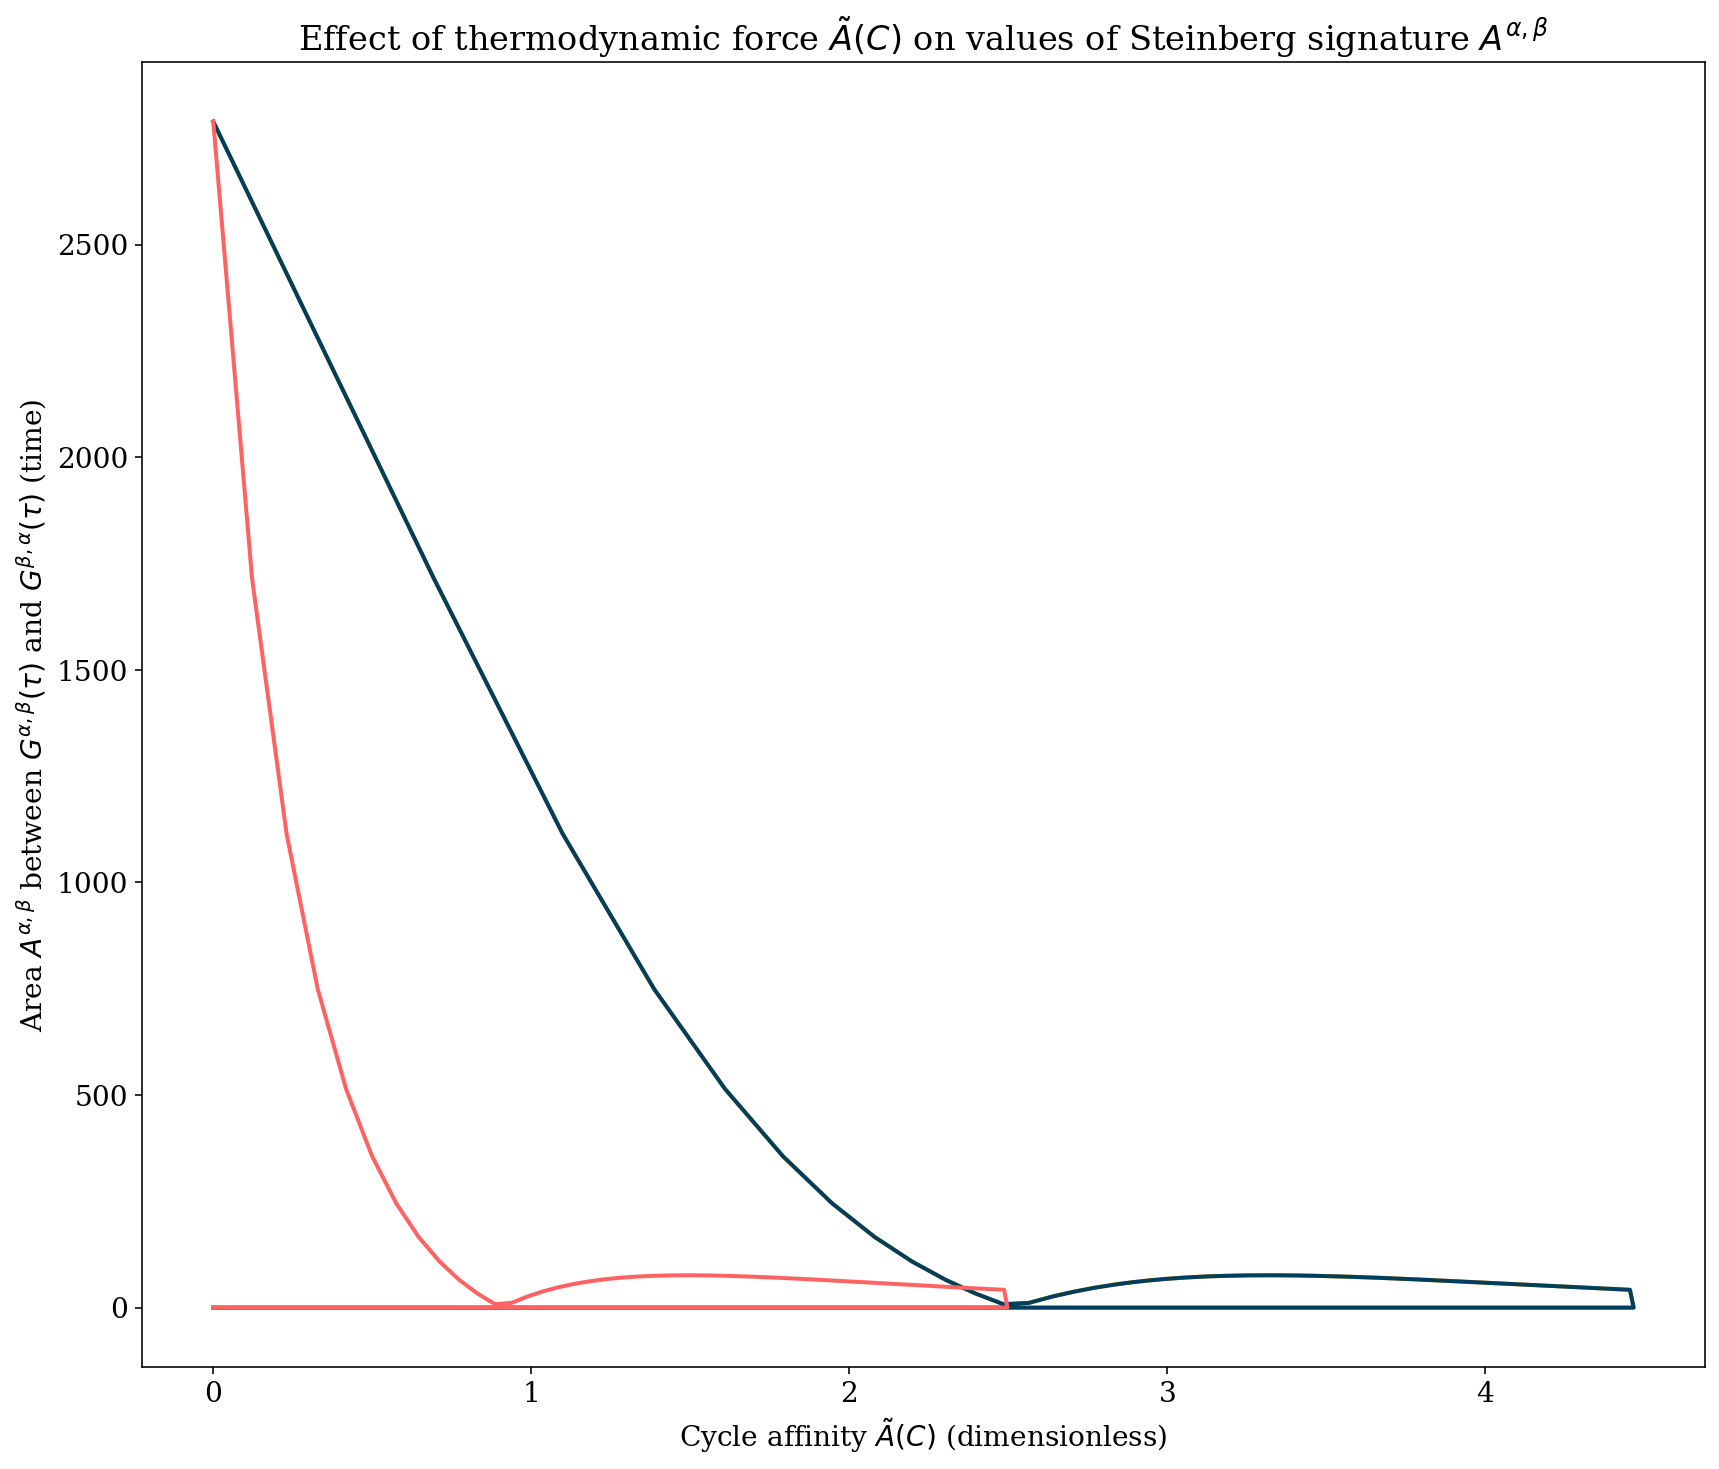

In [195]:
fig, ax = plt.subplots()
plt.plot(all_affinities[:,0],all_areas,label='cycle 1',linewidth=2,color='#ffa600')
plt.plot(all_affinities[:,1],all_areas,label='cycle 2',linewidth=2,color='#003f5c')
plt.plot(all_affinities[:,2],all_areas,label='cycle 3',linewidth=2,color='#ff6361')
plt.xlabel(r'Cycle affinity $\tilde{A}(C)$ (dimensionless)')
plt.ylabel(r'Area $A^{\alpha,\beta}$ between $G^{\alpha,\beta}(\tau)$ and $G^{\beta,\alpha}(\tau)$ (time)')
plt.title(r'Effect of thermodynamic force $\tilde{A}(C)$ on values of Steinberg signature $A^{\alpha,\beta}$')
fig.savefig('Gex1_forcearea-DAC_backup.png')

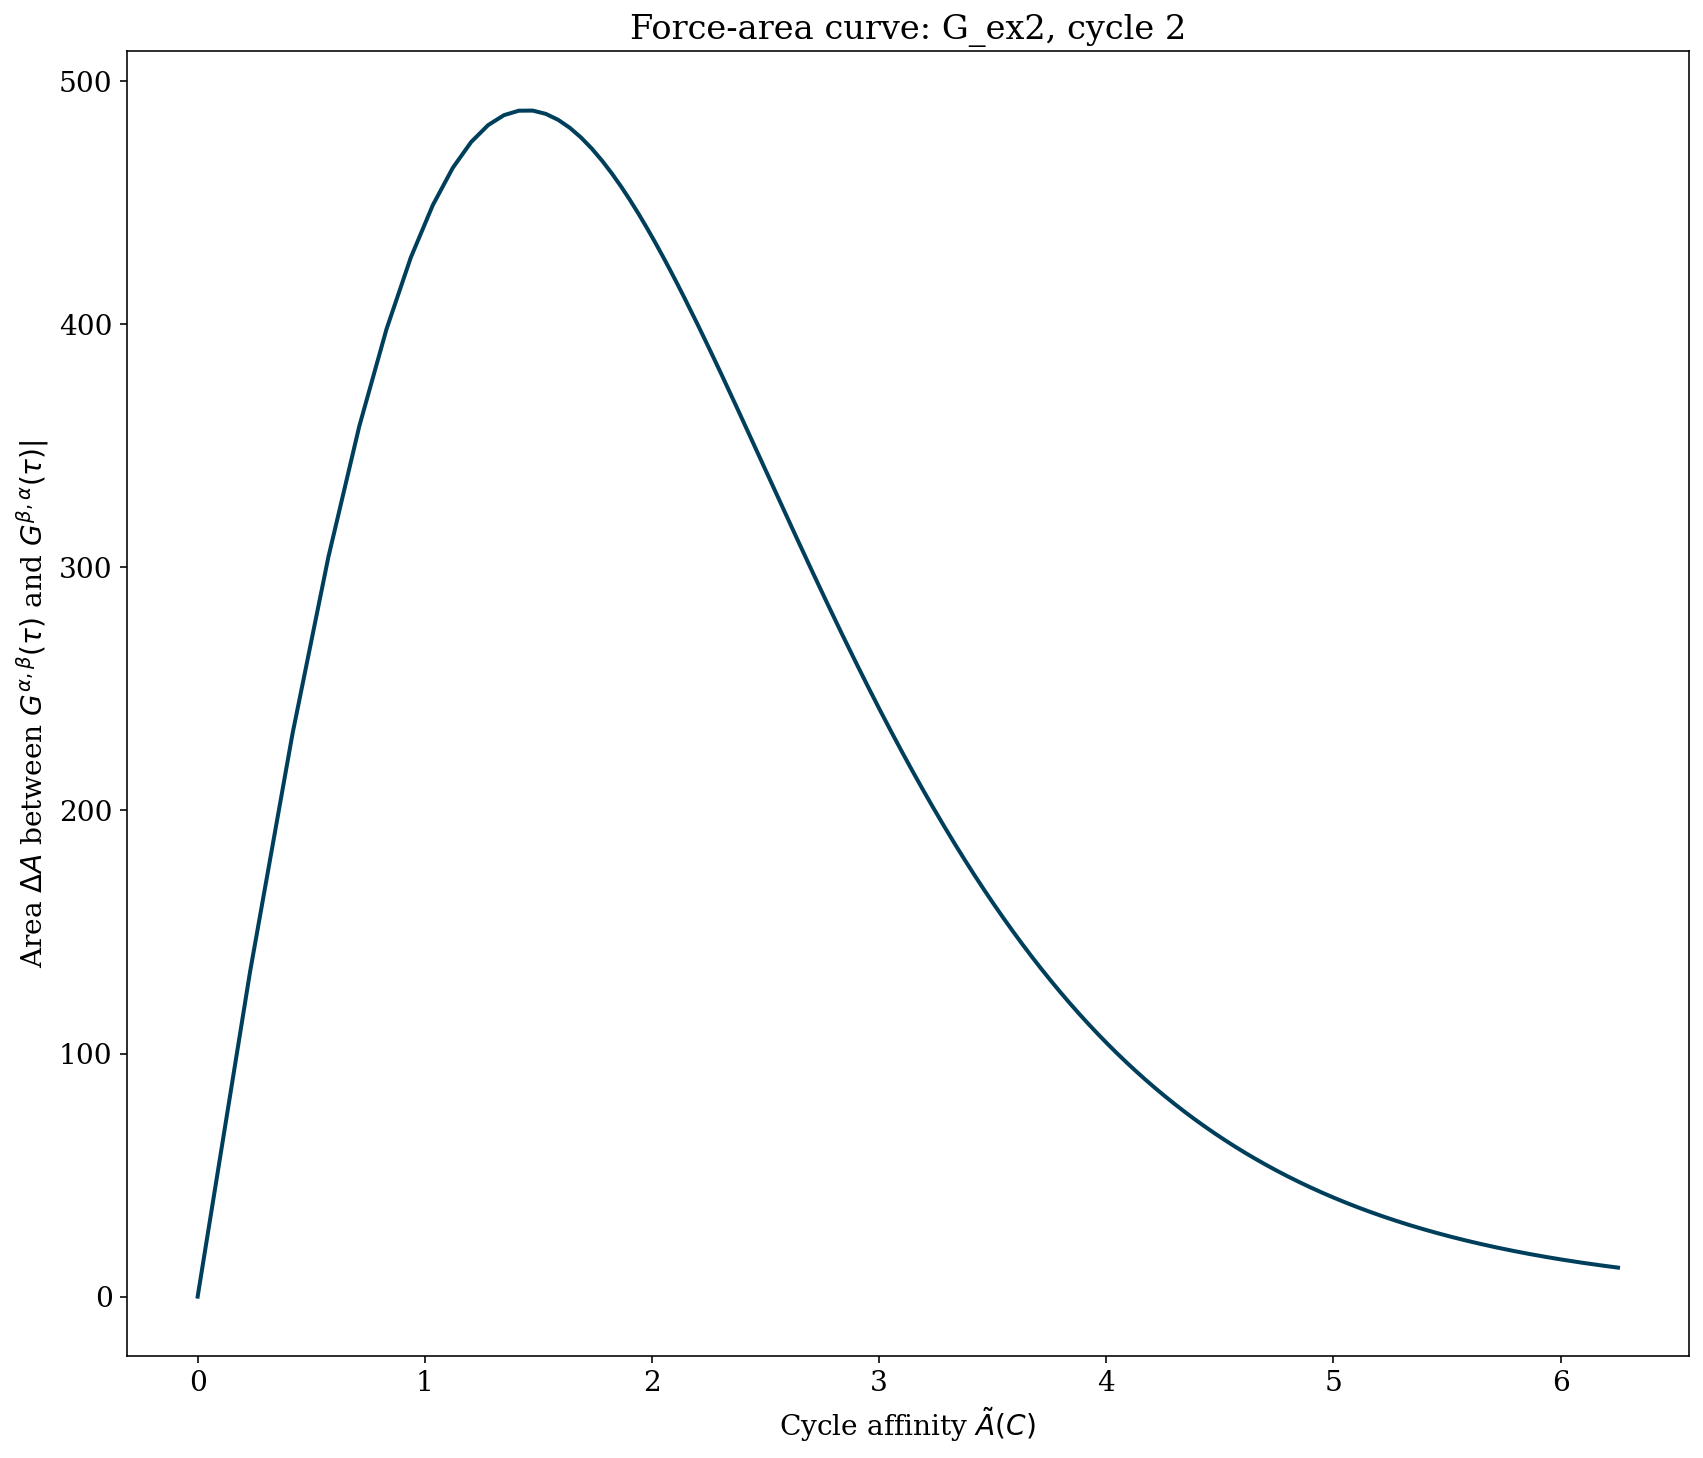

In [78]:
fig, ax = plt.subplots()
plt.plot(all_affinities[:,1],all_areas,linewidth=2,color='#003f5c')
plt.xlabel(r'Cycle affinity $\tilde{A}(C)$')
plt.ylabel(r'Area $\Delta A$ between $G^{\alpha,\beta}(\tau)$ and $G^{\beta,\alpha}(\tau)|$')
plt.title(r'Force-area curve: G_ex2, cycle 2')
fig.savefig('G_ex2_cycle2_1.png')

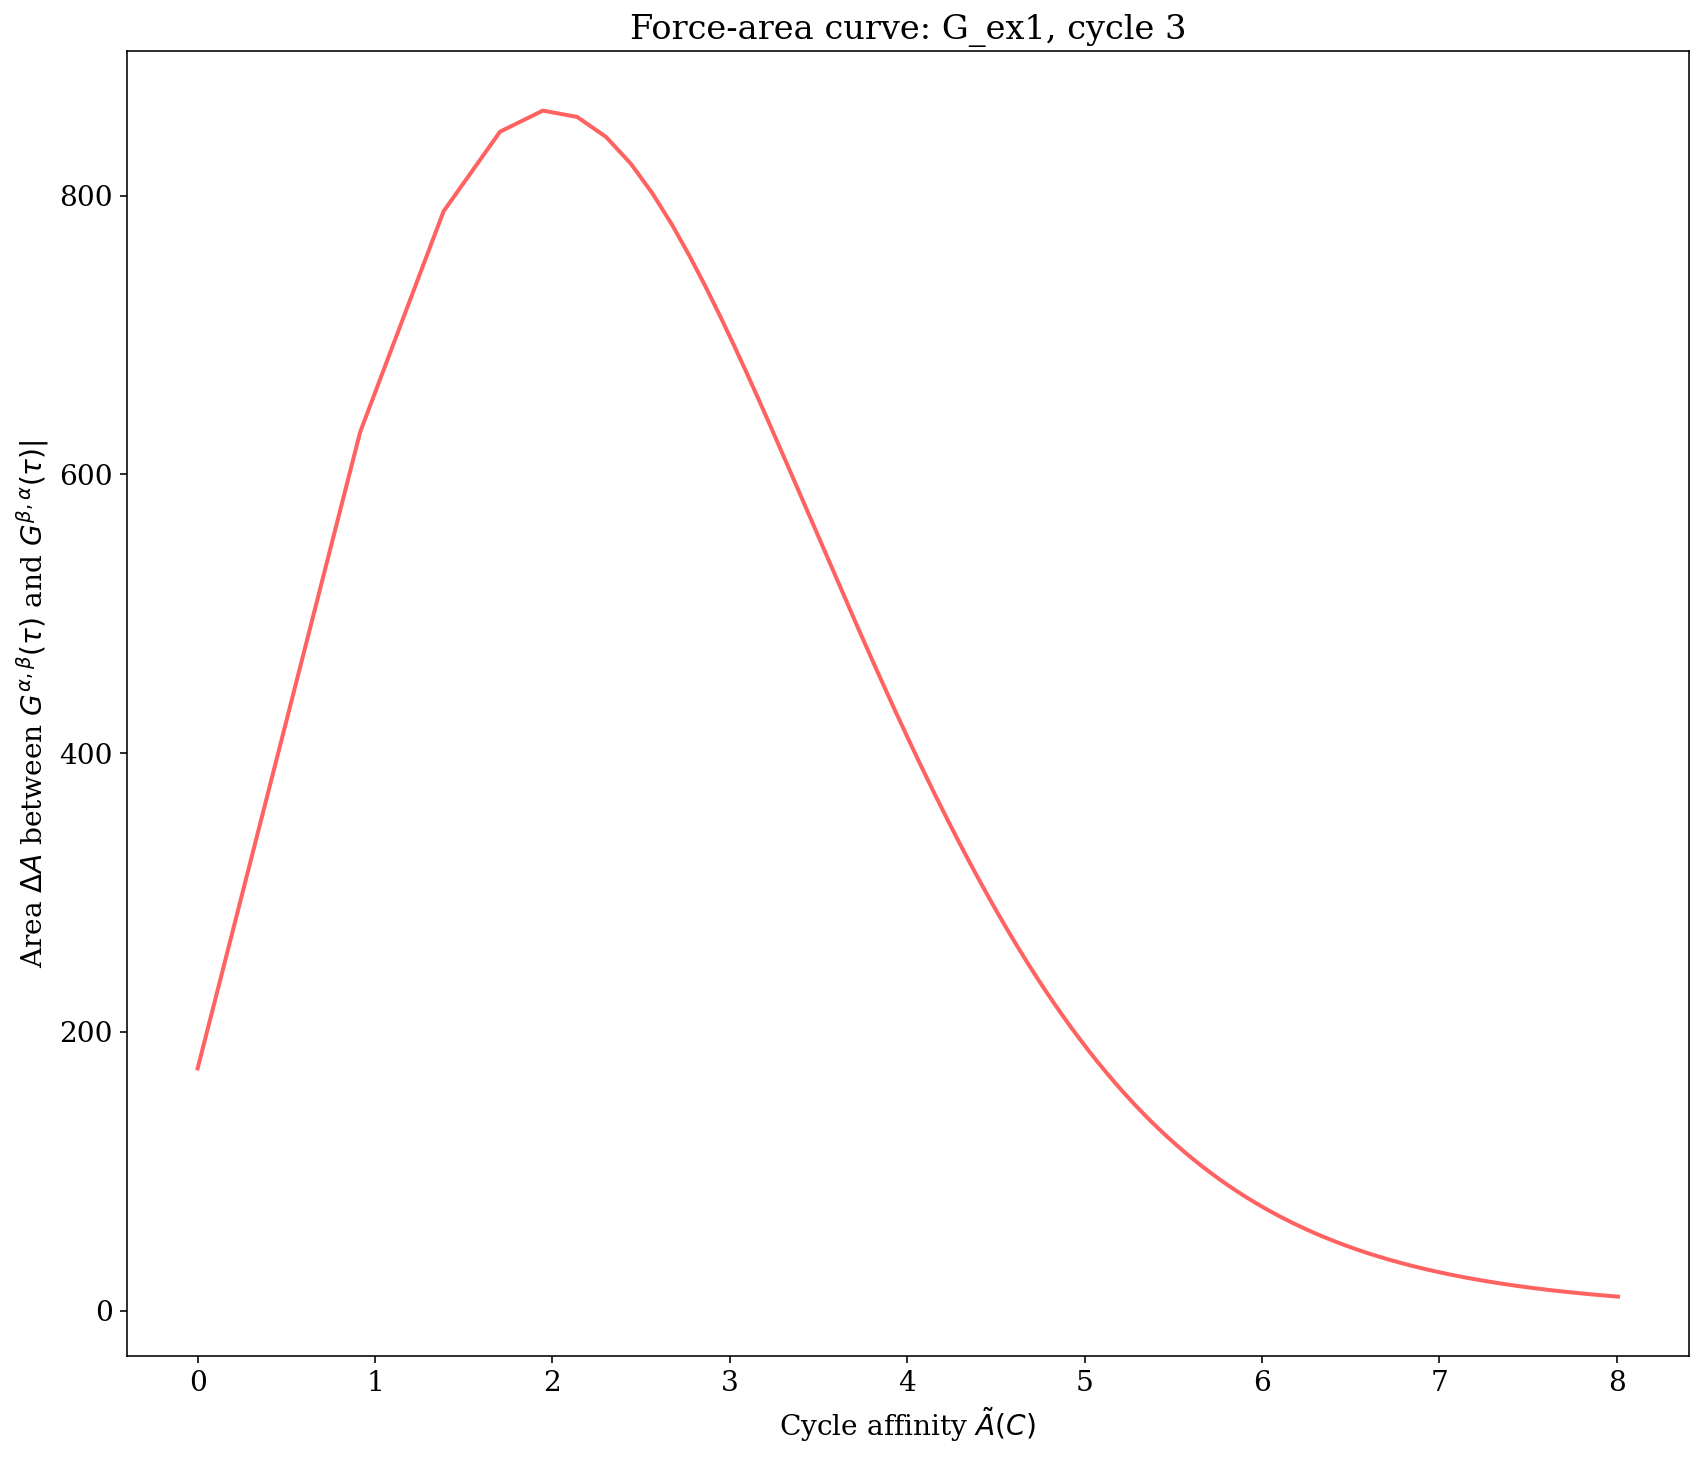

In [263]:
# fig, ax = plt.subplots()
# plt.plot(all_affinities[:,2],all_areas,linewidth=2,color='#ff6361')
# plt.xlabel(r'Cycle affinity $\tilde{A}(C)$')
# plt.ylabel(r'Area $\Delta A$ between $G^{\alpha,\beta}(\tau)$ and $G^{\beta,\alpha}(\tau)|$')
# plt.title(r'Force-area curve: G_ex1, cycle 3')
# fig.savefig('G_ex1_cycle3_2.png')

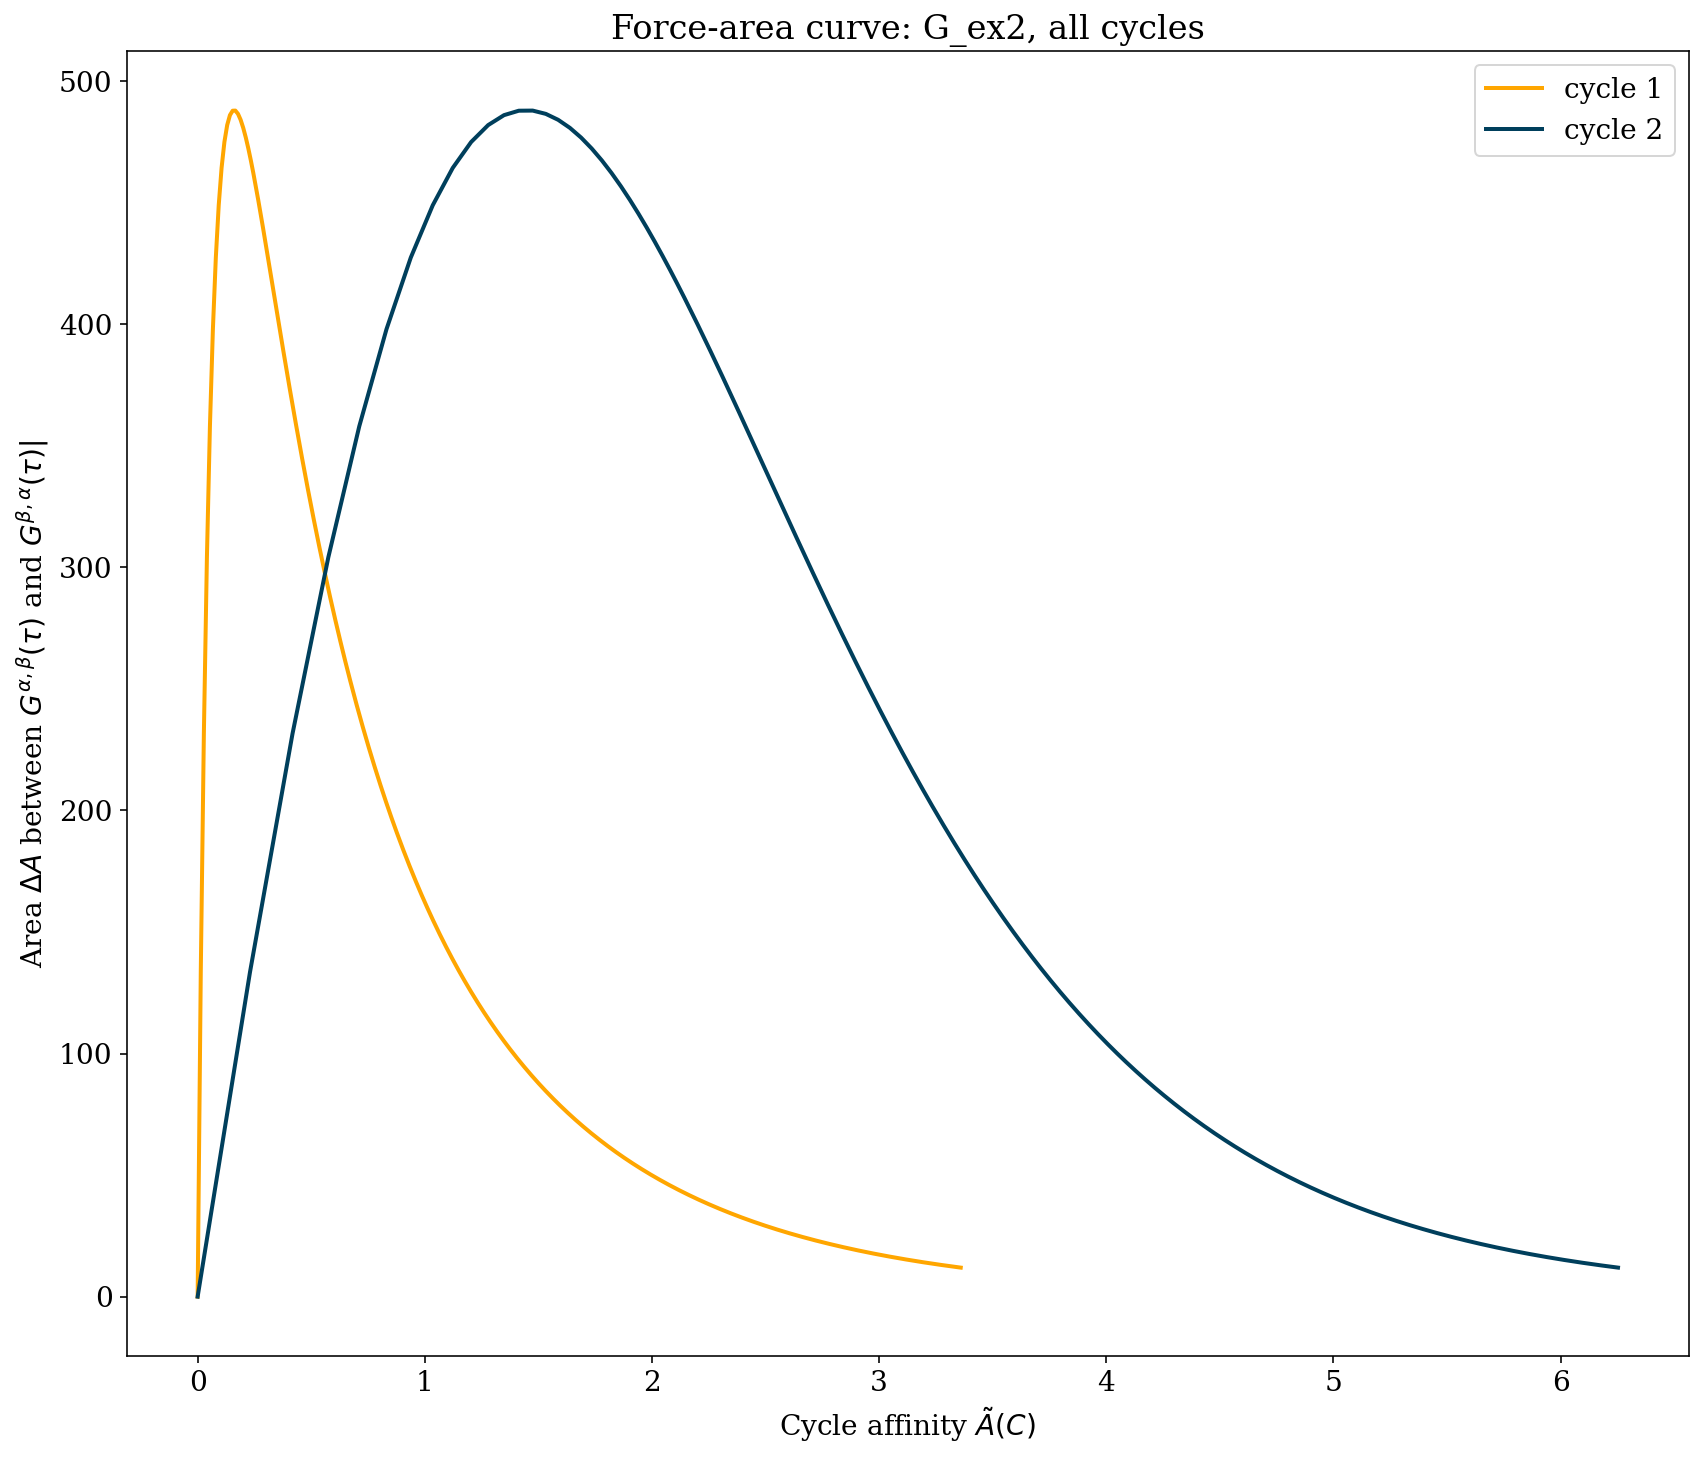

In [79]:
fig, ax = plt.subplots()
plt.plot(all_affinities[:,0],all_areas,label='cycle 1',linewidth=2,color='#ffa600')
plt.plot(all_affinities[:,1],all_areas,label='cycle 2',linewidth=2,color='#003f5c')
plt.plot(all_affinities[:,2],all_areas,label='cycle 3',linewidth=2,color='#ff6361')
plt.legend()
plt.xlabel(r'Cycle affinity $\tilde{A}(C)$')
plt.ylabel(r'Area $\Delta A$ between $G^{\alpha,\beta}(\tau)$ and $G^{\beta,\alpha}(\tau)|$')
plt.title(r'Force-area curve: G_ex2, all cycles')
fig.savefig('G_ex2_allcycles_1.png')

## Troubleshooting force-area plots

Need to double check the area calculation. Something isn't going right here.

In [266]:
weight_dict = {(1, 2): 9, (1, 4): 4, (1, 5): 2, (2, 1): 2, (2, 4): 0.6666666666666666, (2, 3): 0.6666666666666666, (2, 5): 0.16666666666666666, (3, 2): 4, (3, 4): 8, (4, 2): 6, (4, 3): 2, (4, 1): 8, (5, 2): 3, (5, 1): 8}

In [267]:
weight_list = np.fromiter(weight_dict.values(), dtype=float)
print(weight_list)

[9.         4.         2.         2.         0.66666667 0.66666667
 0.16666667 4.         8.         6.         2.         8.
 3.         8.        ]


In [268]:
L = Laplacian_all(edge_list,weight_list,num_nodes,num_edges)
t, t_rev = NG_III_autocorrelation_analytical(observable_ex1,L,tau_n,alpha=1,beta=3)

In [269]:
np.abs(np.trapz(t)-np.trapz(t_rev))

173.78893584990874